In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

In [ ]:
dataset = pd.read_csv("./Ak-new-csv.csv")
dataset.head()

,DATE,Day of Week,MALE,FEMALE,CHILDREN,TOTAL,TITHE,OFFERING,Amount,REMARK
0,01/05/2019,Wednesday,48.0,64.0,10.0,122.0,13600,27350,40950,bible study
1,03/05/2019,Friday,25.0,23.0,6.0,54.0,0,66290,66290,miracle service
2,05/05/2019,Sunday,162.0,177.0,0.0,339.0,628660,153815,782475,pnuema worship
3,08/05/2019,Wednesday,61.0,88.0,4.0,153.0,148500,3900,152400,bible study
4,10/05/2019,Friday,21.0,30.0,0.0,51.0,0,16600,16600,miracle service


In [ ]:
dataset.shape

(677, 10)

In [ ]:
dataset.isnull().sum()

DATE             0
Day of Week      0
MALE           207
FEMALE         207
CHILDREN       207
TOTAL          202
TITHE            0
OFFERING         0
Amount           0
REMARK           0
dtype: int64

In [ ]:
dataset.columns = dataset.columns.str.lower()

In [ ]:
dataset.columns

Index(['date', 'day of week', 'male', 'female', 'children', 'total', 'tithe',
       'offering', 'amount', 'remark'],
      dtype='object')

In [ ]:
series_data = dataset.loc[:, ['date', 'total', 'amount']]
series_data

,date,total,amount
0,01/05/2019,122.0,40950
1,03/05/2019,54.0,66290
2,05/05/2019,339.0,782475
3,08/05/2019,153.0,152400
4,10/05/2019,51.0,16600
...,...,...,...
672,17/02/2023,43.0,11930
673,18/02/2023,116.0,15460
674,19/02/2023,604.0,1457100
675,22/02/2023,152.0,28400


In [ ]:
date_arrays = []
for i in series_data["date"].values:
    d = i.split("/")
    vals = d[1:]
    date_join = "/".join(vals)
    date_arrays.append(date_join)
series_data["month_year"] = date_arrays

In [ ]:
series_data

,date,total,amount,month_year
0,01/05/2019,122.0,40950,05/2019
1,03/05/2019,54.0,66290,05/2019
2,05/05/2019,339.0,782475,05/2019
3,08/05/2019,153.0,152400,05/2019
4,10/05/2019,51.0,16600,05/2019
...,...,...,...,...
672,17/02/2023,43.0,11930,02/2023
673,18/02/2023,116.0,15460,02/2023
674,19/02/2023,604.0,1457100,02/2023
675,22/02/2023,152.0,28400,02/2023


In [ ]:
mean_t = series_data['total'].mean()
std_t = series_data['total'].std()
def fillna(value):
    if value != np.nan:
        value = np.random.normal(loc=mean_t, scale=std_t)
    return np.abs(int(value))

In [ ]:
series_data.loc[:, 'total'] = series_data.loc[:, 'total'].apply(lambda x: fillna(x))

In [ ]:
series_data.isnull().sum()

date          0
total         0
amount        0
month_year    0
dtype: int64

In [ ]:
series_data

,date,total,amount,month_year
0,01/05/2019,515,40950,05/2019
1,03/05/2019,62,66290,05/2019
2,05/05/2019,163,782475,05/2019
3,08/05/2019,496,152400,05/2019
4,10/05/2019,527,16600,05/2019
...,...,...,...,...
672,17/02/2023,523,11930,02/2023
673,18/02/2023,4,15460,02/2023
674,19/02/2023,79,1457100,02/2023
675,22/02/2023,365,28400,02/2023


In [ ]:
series_data = series_data.groupby("month_year")["total", "amount"].mean()
series_data = series_data.reset_index()
series_data.head()

,month_year,total,amount
0,01/2020,268.312500,105076.875000
1,01/2021,264.333333,244315.833333
2,01/2022,256.950000,156240.750000
3,01/2023,331.900000,163527.500000
4,02/2020,340.090909,452970.909091


In [ ]:
series_data

,month_year,total,amount
0,01/2020,268.312500,105076.875000
1,01/2021,264.333333,244315.833333
2,01/2022,256.950000,156240.750000
3,01/2023,331.900000,163527.500000
4,02/2020,340.090909,452970.909091
5,02/2021,226.833333,449768.750000
6,02/2022,300.625000,462360.937500
7,02/2023,234.785714,352132.857143
8,03/2020,322.166667,499745.833333
9,03/2021,320.307692,233314.230769


In [ ]:
series_data['total'] = series_data['total'].astype(np.int64)
series_data['amount'] = series_data['amount'].astype(np.int64)

In [ ]:
amount_series = series_data.drop('total', axis=1)
attendance_series = series_data.drop('amount', axis=1)

In [ ]:
amount_series.head()

,month_year,amount
0,01/2020,105076
1,01/2021,244315
2,01/2022,156240
3,01/2023,163527
4,02/2020,452970


In [ ]:
attendance_series.head()

,month_year,total
0,01/2020,268
1,01/2021,264
2,01/2022,256
3,01/2023,331
4,02/2020,340


In [ ]:
amount_series = amount_series.set_index('month_year')


In [ ]:
attendance_series = attendance_series.set_index('month_year')

In [ ]:
amount_series

,amount
month_year,
01/2020,105076
01/2021,244315
01/2022,156240
01/2023,163527
02/2020,452970
02/2021,449768
02/2022,462360
02/2023,352132
03/2020,499745


In [ ]:
attendance_series

,total
month_year,
01/2020,268
01/2021,264
01/2022,256
01/2023,331
02/2020,340
02/2021,226
02/2022,300
02/2023,234
03/2020,322


## INCOME

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
amount_series = amount_series.sort_index()

In [ ]:
index =  pd.to_datetime(amount_series.index)

In [ ]:
amount_series.index = index

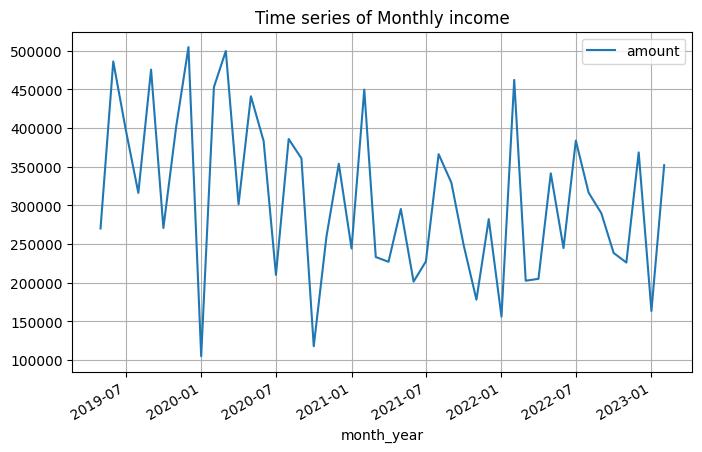

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
amount_series.plot(kind='line', ax=ax, grid=True)
ax.set_title("Time series of Monthly income")
plt.show()

**Time Series Decomposition:**   
A time series is usually composed of the following components:
   > **1) Trend :** This component usually is increasing, decreasing, or constant.  
   > **2) Seasonality :** This is the periodic behavior of the time series that occurs within a year.   
   > **3) Residual :** This is what remains of the time series after the trend and seasonality are removed.  

The basic approach to seasonal decomposition splits the time series into above components.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

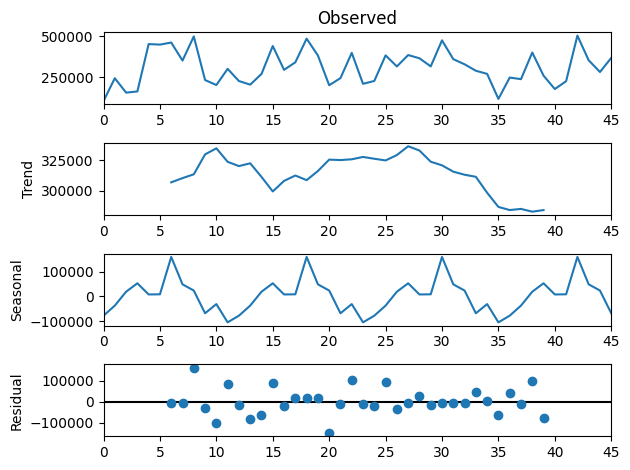

In [ ]:
decompose_add = seasonal_decompose(amount_series.values, period=12)
decompose_add.plot()
plt.show()

**Stationary Time Series :**   
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict

Sign of obvious trends, seasonality, or other systematic structures in the series are indicators of a non-stationary series. A more accurate method would be to use a statistical test, such as the Dickey-Fuller test.

**ADFuller Test:**  
If Test statistic < Critical Value and p-value < 0.05 – then series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# functon for adf test
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)


In [ ]:
# calling adf function and passing series
adf_test(amount_series.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                 -4.542659
p-value                         0.000165
#Lags Used                      4.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


**The p-value obtained is less than significance level of 0.05 and the ADF statistic is less than any of the critical values. Hence the zero ordered differenced series is stationary and d=0**



---



---



**Autocorrelation and Partial Autocorrelation Function:**  
Autocorrelation and partial autocorrelation are plots that graphically summarize the impact of observations at prior timesteps on the observations we are trying to predict.

**ACF plot gives the q value and PACF gives the p value**  
Look for tail of pattern in either ACF or PACF. If tail is crossing the blue region then it will give us potential p and q values.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

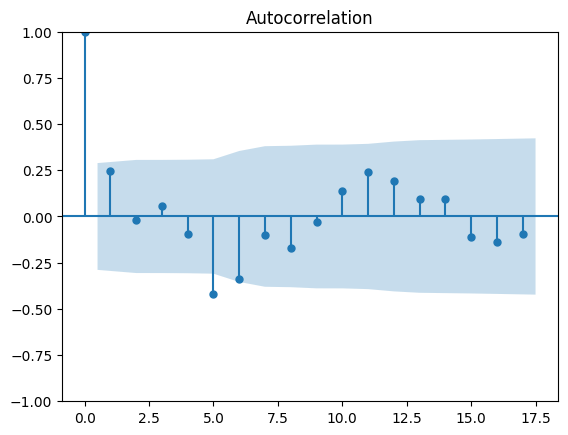

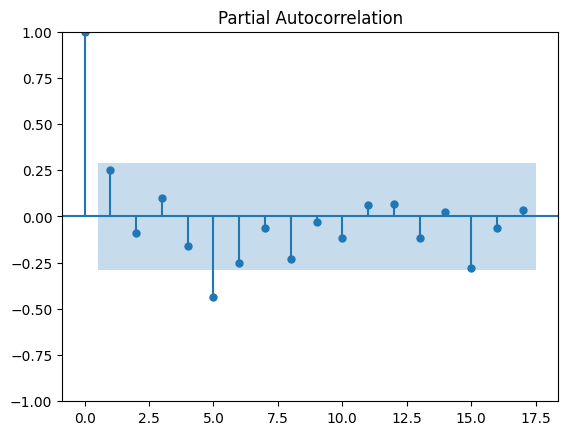

In [ ]:
# if the series is not stationary then make sure to pass differenced series instead of original series
plot_acf(amount_series);
plot_pacf(amount_series);


1.   From ACF plot we can see that q value 5
2.   From PACF plot we can see that p value 5




### Split dataset to Train and Test

In [ ]:
amount_series

,amount
month_year,
2020-01-01,105076
2021-01-01,244315
2022-01-01,156240
2023-01-01,163527
2020-02-01,452970
2021-02-01,449768
2022-02-01,462360
2023-02-01,352132
2020-03-01,499745


In [ ]:
amount_series.index = pd.to_datetime(amount_series.index, format='%m/%Y')
amount_series = amount_series.sort_index()

In [ ]:
train_df = amount_series.loc[:'2022-05-01']
test_df = amount_series.loc['2022-06-01':]

In [ ]:
train_df.shape

(37, 1)

In [ ]:
test_df.shape

(9, 1)

### Time series forecasting

In [ ]:
!pip install prophet --q

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#### **Exponential Smoothing:**  
Exponential smoothing is a time series forecasting method for univariate data. There are three main types of exponential smoothing time series forecasting methods.
A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality.

##### **Single Exponential Smoothing**

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

In [ ]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='month_year'>

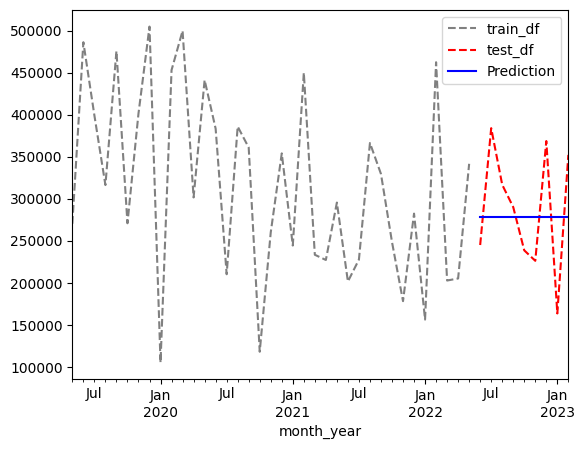

In [ ]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE: 113756.53678695635
Test RMSE: 70722.10552380735
Train MAPE: 0.380806627037971
Test MAPE: 0.23607630774843102


##### **Double Exponential Smoothing**
   
Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series

In [ ]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


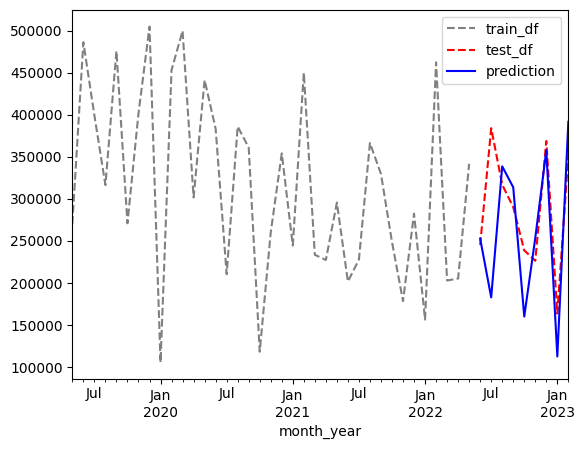

In [ ]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE: 79520.84228241336
Test RMSE: 76647.64527420724
Train MAPE: 0.2654759246148177
Test MAPE: 0.17904975156104672


##### **Triple Exponential Smoothing**
Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series. Also known as Holt-Winters Exponential Smoothing.

In [ ]:
hw_model = ExponentialSmoothing(train_df['amount'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add",
                          damped_trend=True).fit()
hw_train_pred =  hw_model.fittedvalues
hw_test_pred =  hw_model.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


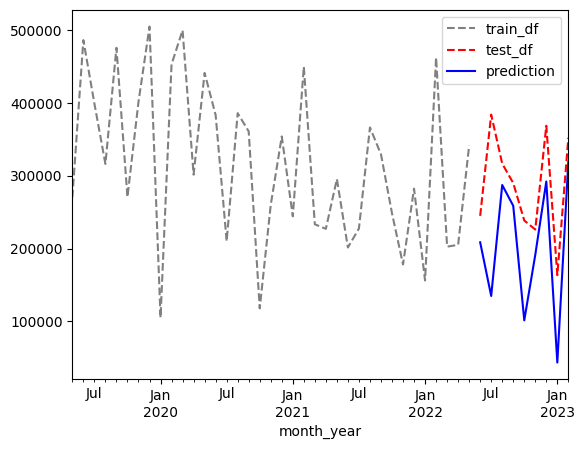

In [ ]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
hw_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, hw_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, hw_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, hw_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, hw_test_pred))

Train RMSE: 74902.12119724185
Test RMSE: 108760.70346207492
Train MAPE: 0.23515133903576746
Test MAPE: 0.3066311320524492


#### **ARIMA**

A popular and widely used statistical method for time series forecasting is the ARIMA model. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. The parameters of the ARIMA model are defined as follows:

>**p** : The number of lag observations included in the model, also called the lag order.   
>**d** : The number of times that the raw observations are differenced, also called the degree of differencing.   
>**q** : The size of the moving average window, also called the order of moving average.

In [ ]:
ar = ARIMA(train_df, order=(5,0,5)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


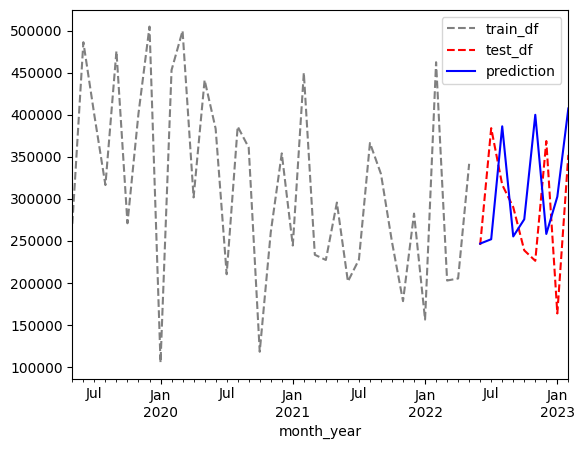

In [ ]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE: 81509.58685557972
Test RMSE: 99772.58357148075
Train MAPE: 0.27782731592115856
Test MAPE: 0.32442099676305386


In [ ]:
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
p = range(0, 5, 1)
d = 0
q = range(0, 5, 1)
P = range(0, 5, 1)
D = 0
Q = range(0, 5, 1)
s = parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

625


In [ ]:
result_df = optimize_SARIMA(parameters_list, 0, 0, 5, train_df)


In [ ]:
result_df

,"(p,q)x(P,Q)",AIC
0,"(2, 1, 1, 3)",227.839130
1,"(1, 0, 2, 1)",490.103861
2,"(3, 3, 0, 0)",962.696516
3,"(3, 3, 1, 0)",963.491383
4,"(3, 3, 0, 2)",963.683396
...,...,...
620,"(0, 1, 4, 3)",1037.035106
621,"(0, 1, 3, 4)",1037.035948
622,"(0, 2, 4, 4)",1037.539653
623,"(0, 1, 4, 4)",1039.034330


In [ ]:
sar =  SARIMAX(train_df, order=(2, 0, 1), seasonal_order=(1, 0, 3, 12)).fit(dis=-1)
sar_train_pred = sar.fittedvalues
sar_test_pred = sar.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


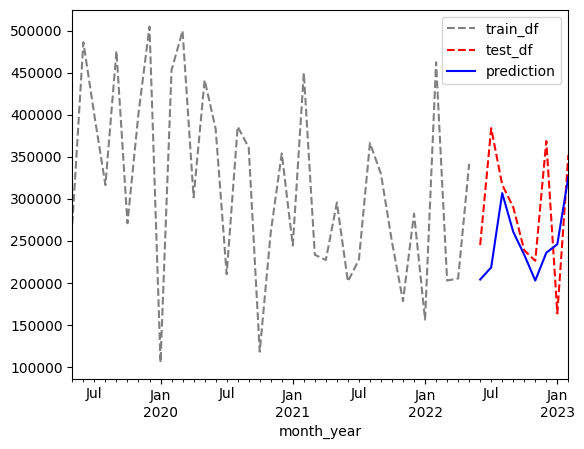

In [ ]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
sar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, sar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, sar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, sar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, sar_test_pred))

Train RMSE: 113851.0543316446
Test RMSE: 78710.41487408052
Train MAPE: 0.3701833732292082
Test MAPE: 0.19950717197378007


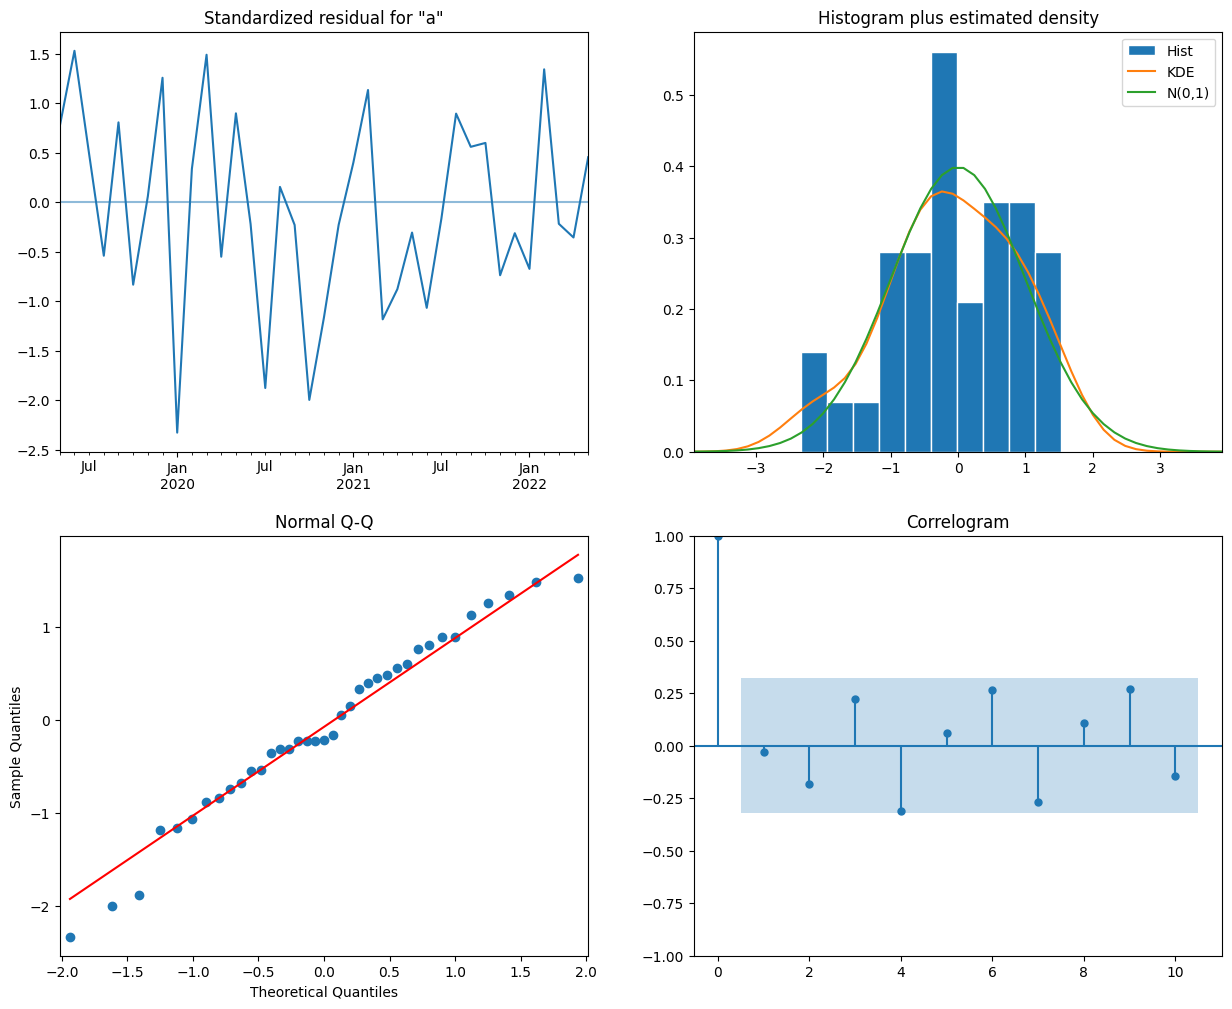

In [ ]:
sar.plot_diagnostics(figsize=(15,12));

#### **Prophet**

The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.

The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

In [ ]:
# converting the original dataframe into required format by prophet
prophet_df = amount_series.copy()
prophet_df.reset_index(inplace=True)
prophet_df.columns=['ds','y']
prophet_df.head()

,ds,y
0,2019-05-01,270234
1,2019-06-01,486171
2,2019-07-01,399120
3,2019-08-01,316251
4,2019-09-01,475672


In [ ]:
# train test split data
prophet_train_df = prophet_df.iloc[:-9]
prophet_test_df = prophet_df.iloc[-9:]

In [ ]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_df) #fit training data to model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv_2qi6un/xx8scyod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv_2qi6un/d5wtc_o7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81786', 'data', 'file=/tmp/tmpv_2qi6un/xx8scyod.json', 'init=/tmp/tmpv_2qi6un/d5wtc_o7.json', 'output', 'file=/tmp/tmpv_2qi6un/prophet_model8gfihqnf/prophet_model-20230516203402.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model.make_future_dataframe(periods=9, freq='M')
prophet_predictions = prophet_model.predict(future)

In [ ]:
prophet_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
41,2022-09-30,217714.667988,64846.127343,197275.464398,217714.665657,217714.670156,-86978.861071,-86978.861071,-86978.861071,-86978.861071,-86978.861071,-86978.861071,0.0,0.0,0.0,130735.806917
42,2022-10-31,213292.626427,220558.055602,354841.266370,213292.623350,213292.629215,72911.320517,72911.320517,72911.320517,72911.320517,72911.320517,72911.320517,0.0,0.0,0.0,286203.946944
43,2022-11-30,209013.231369,379348.513428,511558.678130,209013.227527,209013.234992,233421.084941,233421.084941,233421.084941,233421.084941,233421.084941,233421.084941,0.0,0.0,0.0,442434.316309
44,2022-12-31,204591.189808,-250750.190153,-116519.219324,204591.185203,204591.194179,-386588.667923,-386588.667923,-386588.667923,-386588.667923,-386588.667923,-386588.667923,0.0,0.0,0.0,-181997.478115
45,2023-01-31,200169.148247,309406.784060,436045.746685,200169.142546,200169.153740,170852.502046,170852.502046,170852.502046,170852.502046,170852.502046,170852.502046,0.0,0.0,0.0,371021.650293


In [ ]:
plot_plotly(prophet_model, prophet_predictions)

In [ ]:
prophet_train_df['prophet_train_pred'] = prophet_predictions.iloc[:-9]['yhat']
prophet_test_df['prophet_test_pred'] = prophet_predictions.iloc[-9:]['yhat']

In [ ]:
print('Train RMSE:',mean_squared_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred'])**0.5)
print('Test RMSE:',mean_squared_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred'])**0.5)
print('Train MAPE:',mean_absolute_percentage_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred']))
print('Test MAPE:',mean_absolute_percentage_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred']))

Train RMSE: 50834.55897878751
Test RMSE: 182805.5950026868
Train MAPE: 0.15542466146958886
Test MAPE: 0.5566766147485908


#### **MODELS COMPARISION**

In [ ]:
comparision_df = pd.DataFrame(data=[['Single exp smoothing', 70722 , 0.2360],
                           ['double exp smoothing', 76647,  0.1790],
                          ['Triple exp smoothing', 108760, 0.3066],
                          ['ARIMA(5,0,5)', 99772, 0.3244],
                          ['SARIMAX', 78710, 0.1995],
                          ['prophet', 182805, 0.5567]], columns=['Model','RMSE','MAPE'])

comparision_df.set_index('Model', inplace=True)

In [ ]:
comparision_df.sort_values(by='MAPE')

,RMSE,MAPE
Model,,
double exp smoothing,76647,0.1790
SARIMAX,78710,0.1995
Single exp smoothing,70722,0.2360
Triple exp smoothing,108760,0.3066
"ARIMA(5,0,5)",99772,0.3244
prophet,182805,0.5567


In [ ]:
import pickle

with open('predict_income.pkl', 'wb') as f:
  pickle.dump(double_exp, f)

print("Done")

Done


## ATTENDANCE

In [ ]:
attendance_series = attendance_series.sort_index()
index =  pd.to_datetime(attendance_series.index)
attendance_series.index = index

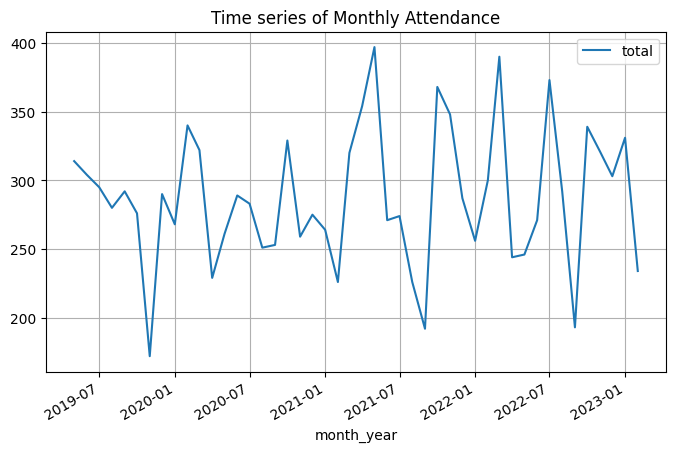

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
attendance_series.plot(kind='line', ax=ax, grid=True)
ax.set_title("Time series of Monthly Attendance")
plt.show()

**Time Series Decomposition:**   

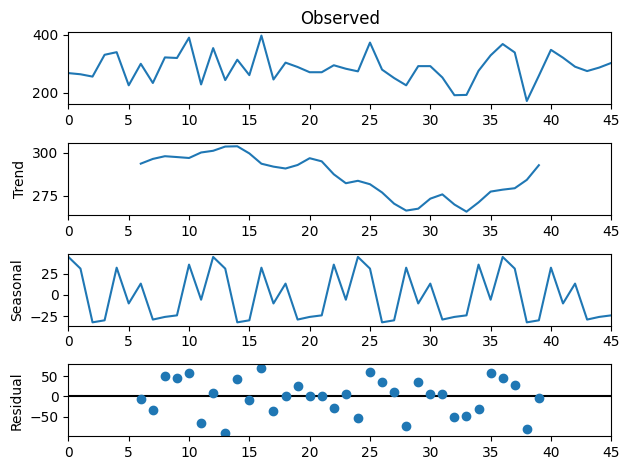

In [ ]:
decompose_add = seasonal_decompose(attendance_series.values, period=12)
decompose_add.plot()
plt.show()

**ADFuller Test:**

In [ ]:
adf_test(attendance_series.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                -5.889090e+00
p-value                        2.953482e-07
#Lags Used                     2.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


**Autocorrelation and Partial Autocorrelation Function:**

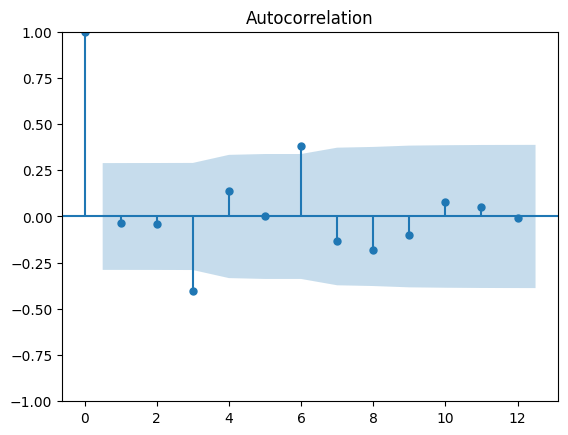

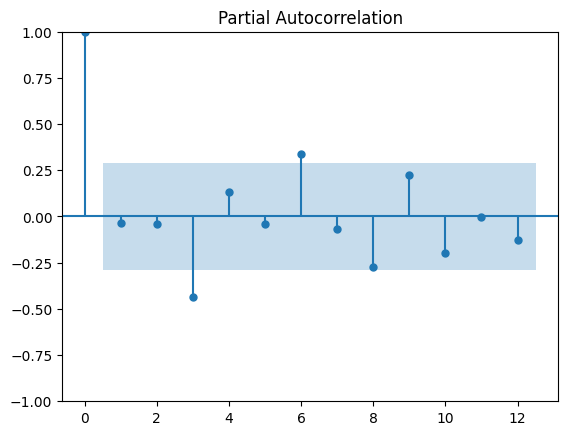

In [ ]:
plot_acf(attendance_series, lags=12);
plot_pacf(attendance_series, lags=12);

### Split dataset to Train and Test

In [ ]:
attendance_series.index = pd.to_datetime(attendance_series.index, format='%m/%Y')
attendance_series = attendance_series.sort_index()

In [ ]:
train_df = attendance_series.loc[:'2022-05-01']
test_df = attendance_series.loc['2022-06-01':]

In [ ]:
test_df.shape

(9, 1)

### Time series forecasting

#### **Exponential Smoothing:**

##### **Single Exponential Smoothing**

In [ ]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<Axes: xlabel='month_year'>

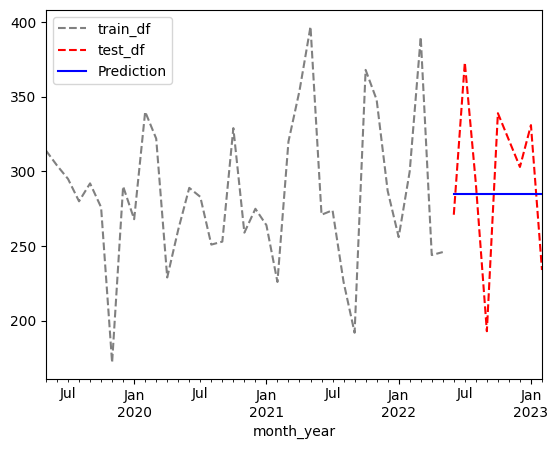

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE: 48.937921409320595
Test RMSE: 53.44362111774352
Train MAPE: 0.13795231732819682
Test MAPE: 0.16400117912759246


##### **Double Exponential Smoothing**

In [ ]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



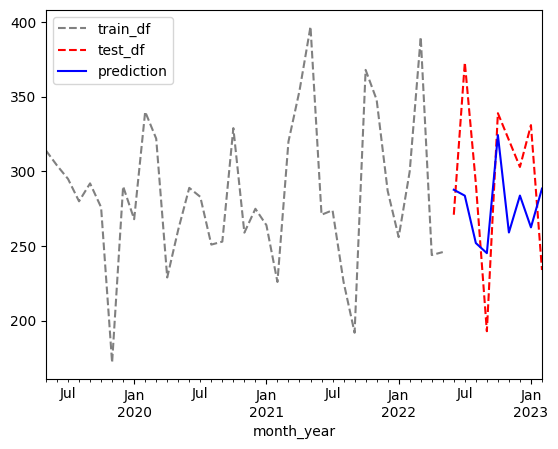

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE: 40.614518868086684
Test RMSE: 52.32096145076527
Train MAPE: 0.10899973274040888
Test MAPE: 0.16084163214144853


##### **Triple Exponential Smoothing**

In [ ]:
hw_model = ExponentialSmoothing(train_df['total'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add",
                          damped_trend=True).fit()
hw_train_pred =  hw_model.fittedvalues
hw_test_pred =  hw_model.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



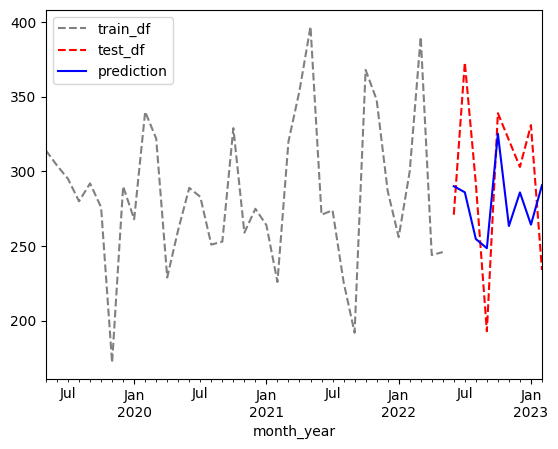

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
hw_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, hw_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, hw_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, hw_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, hw_test_pred))

Train RMSE: 41.046091092445025
Test RMSE: 51.47969845909955
Train MAPE: 0.11090802289130748
Test MAPE: 0.15987944520513966


#### **ARIMA**

In [ ]:
ar = ARIMA(train_df, order=(4,0,4)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



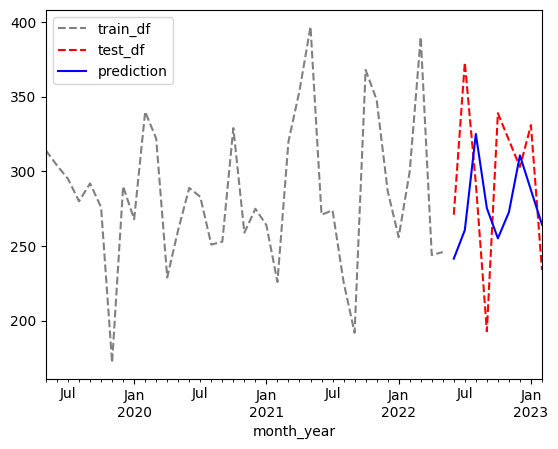

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE: 42.19100589269956
Test RMSE: 61.092240997301694
Train MAPE: 0.12492210981843173
Test MAPE: 0.18159366651691997


In [ ]:
p = range(0, 4, 1)
d = 0
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 0
Q = range(0, 4, 1)
s = parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 0, 0, 5, train_df)


  0%|          | 0/256 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so

In [ ]:
result_df

,"(p,q)x(P,Q)",AIC
0,"(1, 1, 2, 0)",10.000000
1,"(0, 3, 3, 1)",16.000000
2,"(1, 1, 3, 3)",18.000000
3,"(0, 3, 3, 2)",18.000000
4,"(1, 2, 2, 0)",405.185465
...,...,...
247,"(0, 2, 0, 0)",483.939689
248,"(0, 1, 0, 0)",486.709623
249,"(0, 0, 0, 1)",498.249340
250,"(0, 3, 2, 0)",500.359886


In [ ]:
train_df

,total
month_year,
2019-05-01,314
2019-06-01,304
2019-07-01,295
2019-08-01,280
2019-09-01,292
2019-10-01,276
2019-11-01,172
2019-12-01,290
2020-01-01,268


In [ ]:
sar =  SARIMAX(train_df, order=(0, 0, 1), seasonal_order=(3, 0, 2, 12)).fit(dis=-1)
sar_train_pred = sar.fittedvalues
sar_test_pred = sar.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



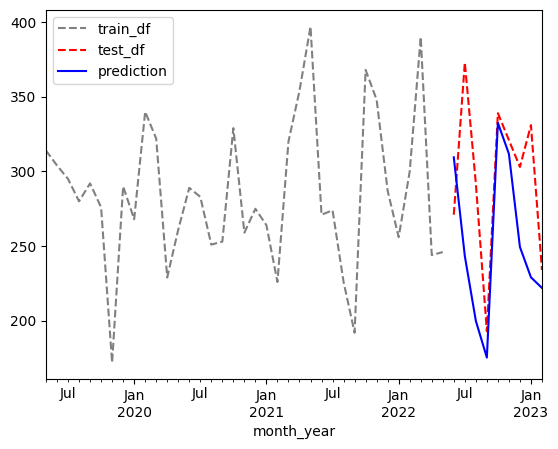

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
sar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

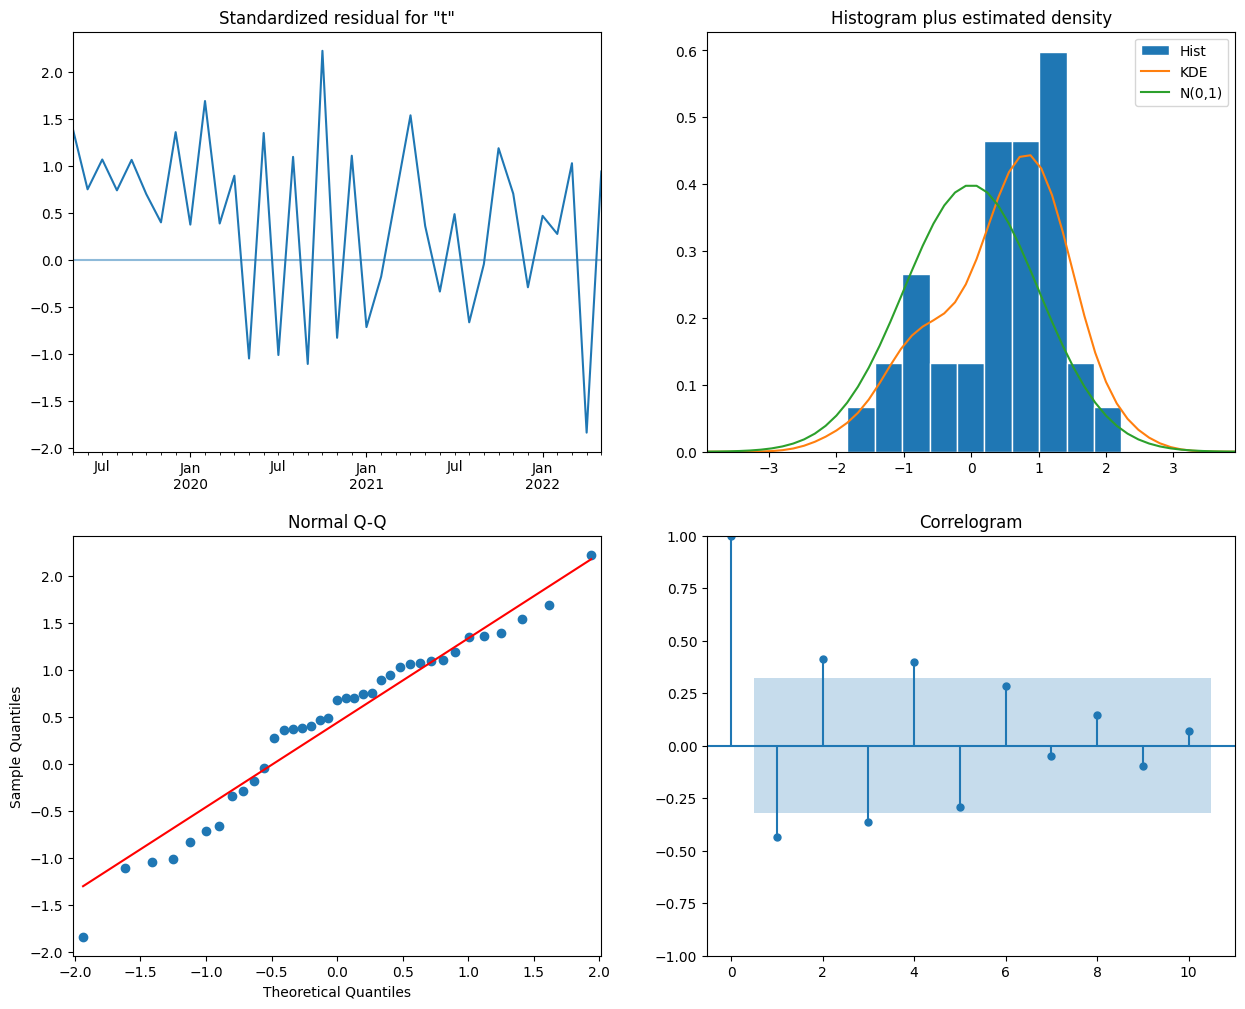

In [ ]:
sar.plot_diagnostics(figsize=(15,12));

#### **Prophet**

In [ ]:
# converting the original dataframe into required format by prophet
prophet_df = attendance_series.copy()
prophet_df.reset_index(inplace=True)
prophet_df.columns=['ds','y']
prophet_df.head()

,ds,y
0,2019-05-01,314
1,2019-06-01,304
2,2019-07-01,295
3,2019-08-01,280
4,2019-09-01,292


In [ ]:
# train test split data
prophet_train_df = prophet_df.iloc[:-9]
prophet_test_df = prophet_df.iloc[-9:]

In [ ]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_df) #fit training data to model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv_2qi6un/4rrbi7o1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv_2qi6un/q2n34d51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99899', 'data', 'file=/tmp/tmpv_2qi6un/4rrbi7o1.json', 'init=/tmp/tmpv_2qi6un/q2n34d51.json', 'output', 'file=/tmp/tmpv_2qi6un/prophet_model6nnlz6sg/prophet_model-20230516203741.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:37:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:37:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model.make_future_dataframe(periods=9, freq='M')
prophet_predictions = prophet_model.predict(future)

In [ ]:
prophet_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
41,2022-09-30,308.705895,206.949439,301.057986,308.705894,308.705897,-53.552275,-53.552275,-53.552275,-53.552275,-53.552275,-53.552275,0.0,0.0,0.0,255.153620
42,2022-10-31,309.208182,78.851037,166.562995,309.208180,309.208184,-187.392211,-187.392211,-187.392211,-187.392211,-187.392211,-187.392211,0.0,0.0,0.0,121.815971
43,2022-11-30,309.694266,286.479279,374.820632,309.694264,309.694268,23.668598,23.668598,23.668598,23.668598,23.668598,23.668598,0.0,0.0,0.0,333.362864
44,2022-12-31,310.196553,241.101912,330.429867,310.196550,310.196555,-26.269674,-26.269674,-26.269674,-26.269674,-26.269674,-26.269674,0.0,0.0,0.0,283.926878
45,2023-01-31,310.698839,394.065478,480.502186,310.698836,310.698842,127.811670,127.811670,127.811670,127.811670,127.811670,127.811670,0.0,0.0,0.0,438.510509


In [ ]:
plot_plotly(prophet_model, prophet_predictions)

In [ ]:
prophet_train_df['prophet_train_pred'] = prophet_predictions.iloc[:-9]['yhat']
prophet_test_df['prophet_test_pred'] = prophet_predictions.iloc[-9:]['yhat']

In [ ]:
print('Train RMSE:',mean_squared_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred'])**0.5)
print('Test RMSE:',mean_squared_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred'])**0.5)
print('Train MAPE:',mean_absolute_percentage_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred']))
print('Test MAPE:',mean_absolute_percentage_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred']))

Train RMSE: 34.94183146333124
Test RMSE: 118.16065018849159
Train MAPE: 0.09490354741782712
Test MAPE: 0.36393950133696373


In [ ]:
import pickle

with open('predict_attendance.pkl', 'wb') as f:
  pickle.dump(ar, f)

print("Done")

Done


In [ ]:
comparision_df = pd.DataFrame(data=[['Single exp smoothing', 53.4436 , 0.1640],
                           ['double exp smoothing', 52.3209,  0.1608],
                          ['Triple exp smoothing', 51.4796, 0.1598],
                          ['ARIMA(4,0,4)', 61.0922, 0.1815],
                          ['prophet', 118.1606, 0.3639]], columns=['Model','RMSE','MAPE'])

comparision_df.set_index('Model', inplace=True)

In [ ]:
comparision_df.sort_values(by='MAPE')

,RMSE,MAPE
Model,,
Triple exp smoothing,51.4796,0.1598
double exp smoothing,52.3209,0.1608
Single exp smoothing,53.4436,0.1640
"ARIMA(4,0,4)",61.0922,0.1815
prophet,118.1606,0.3639
